In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os.path
from math import floor

In [2]:
# load the data
_data = np.load('res/data.npy', allow_pickle=True).tolist()
saps_ii = _data['saps_ii']
X_train, X_val, X_test = _data['X_train'], _data['X_val'], _data['X_test']
Y_train, Y_val, Y_test = _data['Y_train'], _data['Y_val'], _data['Y_test']
print("Loaded!")

Loaded!


In [3]:
# Check that the data has been loaded correctly (outputs should be the same as in data_split.ipynb)
print("No. of patients: {}".format(len(saps_ii)))
print("No. of patients in train, val, test sets: {}, {}, {}".format(len(X_train), len(X_val), len(X_test)))
print("No. of patients who died in hospital in train, val, test sets: {}, {}, {}".format(sum(Y_train), sum(Y_val), sum(Y_test)))
print("Proportion of patients who died in hospital in train, val, test sets: {}%, {}%, {}%".format(round(sum(Y_train)/len(Y_train)*100,3), round(sum(Y_val)/len(Y_val)*100,3), round(sum(Y_test)/len(Y_test)*100,3)))

No. of patients: 38628
No. of patients in train, val, test sets: 27039, 5794, 5795
No. of patients who died in hospital in train, val, test sets: 3039, 678, 685
Proportion of patients who died in hospital in train, val, test sets: 11.239%, 11.702%, 11.821%


In [4]:
# Define labels for each feature
labels = ['Age', 'Heart Rate', 'Systolic BP', 'Temperature', 'PaO2/FiO2', 'Urine Output', 'BUN', \
          'WBC', 'Potassium', 'Sodium', 'Bicarbonate', 'Bilirubin', 'GCS', 'Comorbidity', 'Admission Type']

In [5]:
# Show example of one patient
patient = 2
for feature in range(len(labels)):
    print('{}: {}'.format(labels[feature], X_train[patient,feature]))
print('Outcome: {}'.format('Died in hospital' if Y_train[patient]==1 else 'Survived'))

Age: 38.93
Heart Rate: 120.0
Systolic BP: 130.0
Temperature: 38.3888880411784
PaO2/FiO2: None
Urine Output: 1110.0
BUN: 10.0
WBC: 8.1
Potassium: 3.6
Sodium: 139.0
Bicarbonate: 29.0
Bilirubin: None
GCS: 15.0
Comorbidity: None
Admission Type: Medical
Outcome: Survived


In [6]:
# Replace None values in comorbidity with "None" saps_ii - 18
saps_ii[:,18][saps_ii[:,18] == None] = "None"
X_train[:,13][X_train[:,13] == None] = "None"
X_val[:,13][X_val[:,13] == None] = "None"
X_test[:,13][X_test[:,13] == None] = "None"

In [7]:
# Save to data1.npy
if not os.path.exists('./res'):
    os.makedirs('./res')

tosave = {'saps_ii': saps_ii, 'X_train': X_train, 'X_val': X_val, 'X_test': X_test, 'Y_train': Y_train, 'Y_val': Y_val, 'Y_test': Y_test}
np.save('res/data1.npy',tosave)
print("Saved!")

Saved!


In [8]:
# Calculate the amount of missing data for each feature
num_missing = np.sum(saps_ii[:,5:20]==None,0)
m = len(saps_ii)
pct_missing = num_missing/m * 100
for feature in range(len(labels)):
    print('{}: {}% ({}/{})'.format(labels[feature], round(pct_missing[feature],2), num_missing[feature], m))

Age: 0.0% (0/38628)
Heart Rate: 1.76% (678/38628)
Systolic BP: 1.84% (710/38628)
Temperature: 3.62% (1397/38628)
PaO2/FiO2: 62.43% (24115/38628)
Urine Output: 3.36% (1299/38628)
BUN: 1.57% (608/38628)
WBC: 2.13% (821/38628)
Potassium: 1.36% (526/38628)
Sodium: 1.5% (581/38628)
Bicarbonate: 2.31% (891/38628)
Bilirubin: 57.6% (22248/38628)
GCS: 2.01% (777/38628)
Comorbidity: 0.0% (0/38628)
Admission Type: 0.0% (0/38628)


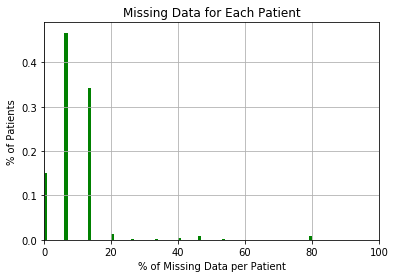

In [8]:
# Visualise how much data is missing per patient
num_missing = np.sum(saps_ii[:,5:20]==None,1)
num_features = np.shape(X_train)[1]
pct_missing = num_missing/num_features * 100
n, bins, patches = plt.hist(pct_missing, 80, density=True, histtype='stepfilled', facecolor='g')
plt.xlabel('% of Missing Data per Patient')
plt.ylabel('% of Patients')
plt.title('Missing Data for Each Patient')
plt.xlim(0, 100)
plt.grid(True)

In [9]:
# Calculate how much data is missing for each patient (as a percentage)
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for num in bins:
    diff = bins[2] - bins[1]
    print("Patients with {}% to {}% of features missing: {}% ({}/{})".format(num-diff, num, round((sum(pct_missing<num)-sum(pct_missing<(num-diff)))/m*100,2), sum(pct_missing<num)-sum(pct_missing<(num-diff)), m))

Patients with 0% to 10% of features missing: 61.64% (23811/38628)
Patients with 10% to 20% of features missing: 34.18% (13203/38628)
Patients with 20% to 30% of features missing: 1.65% (638/38628)
Patients with 30% to 40% of features missing: 0.18% (70/38628)
Patients with 40% to 50% of features missing: 1.35% (522/38628)
Patients with 50% to 60% of features missing: 0.09% (33/38628)
Patients with 60% to 70% of features missing: 0.09% (33/38628)
Patients with 70% to 80% of features missing: 0.02% (8/38628)
Patients with 80% to 90% of features missing: 0.8% (310/38628)
Patients with 90% to 100% of features missing: 0.0% (0/38628)


In [10]:
# Calculate how much data is missing for each patient (by no. of features)
bins = np.array(range(num_features+1))
for num in bins:
    diff = bins[2] - bins[1]
    print("Patients with {} feature{} missing: {}% ({}/{})".format(num, "" if num==1 else "s", round(sum(num_missing==num)/m*100,2), sum(num_missing==num), m))

Patients with 0 features missing: 14.97% (5781/38628)
Patients with 1 feature missing: 46.68% (18030/38628)
Patients with 2 features missing: 34.18% (13203/38628)
Patients with 3 features missing: 1.42% (547/38628)
Patients with 4 features missing: 0.24% (91/38628)
Patients with 5 features missing: 0.18% (70/38628)
Patients with 6 features missing: 0.47% (181/38628)
Patients with 7 features missing: 0.88% (341/38628)
Patients with 8 features missing: 0.09% (33/38628)
Patients with 9 features missing: 0.04% (15/38628)
Patients with 10 features missing: 0.05% (18/38628)
Patients with 11 features missing: 0.02% (8/38628)
Patients with 12 features missing: 0.8% (310/38628)
Patients with 13 features missing: 0.0% (0/38628)
Patients with 14 features missing: 0.0% (0/38628)
Patients with 15 features missing: 0.0% (0/38628)


In [12]:
# Extract a smaller dataset with no missing features
print("Shape of saps_ii: {}".format(np.shape(saps_ii)))
num_missing = np.sum(saps_ii[:,5:20]==None,1)
saps_ii_dense = saps_ii[num_missing==0]
print("Shape of saps_ii_dense: {}".format(np.shape(saps_ii_dense)))
print("")

Shape of saps_ii: (38628, 23)
Shape of saps_ii_dense: (5781, 23)


In [18]:
# Randomly shuffle the newly created dense dataset
saps_ii = np.array(saps_ii_dense)
np.random.shuffle(saps_ii_dense)

# Split the data into training, validation and test sets as before
m = len(saps_ii_dense)
train_split, val_split, test_split = m*0.7, m*0.15, m*0.15 # make sure these numbers sum to m*1.0
train, val, test = \
    saps_ii_dense[:floor(train_split),:], \
    saps_ii_dense[floor(train_split):floor(train_split+test_split),:], \
    saps_ii_dense[floor(train_split+test_split):,:]

# Create input (X) and output (Y) arrays
X_train_dense, X_val_dense, X_test_dense = train[:,5:20], val[:,5:20], test[:,5:20]
Y_train_dense, Y_val_dense, Y_test_dense = train[:,22], val[:,22], test[:,22]

In [19]:
# Print information about the created arrays
print("No. of patients: {}".format(m))
print("No. of patients in train, val, test sets: {}, {}, {}".format(len(X_train_dense), len(X_val_dense), len(X_test_dense)))
print("No. of patients who died in hospital in train, val, test sets: {}, {}, {}".format(sum(Y_train_dense), sum(Y_val_dense), sum(Y_test_dense)))
print("Proportion of patients who died in hospital in train, val, test sets: {}%, {}%, {}%".format(round(sum(Y_train_dense)/len(Y_train_dense)*100,3), round(sum(Y_val_dense)/len(Y_val_dense)*100,3), round(sum(Y_test_dense)/len(Y_test_dense)*100,3)))

No. of patients: 5781
No. of patients in train, val, test sets: 4046, 867, 868
No. of patients who died in hospital in train, val, test sets: 1018, 220, 225
Proportion of patients who died in hospital in train, val, test sets: 25.161%, 25.375%, 25.922%


In [21]:
# Save to data_dense.npy
if not os.path.exists('./res'):
    os.makedirs('./res')

tosave = {'saps_ii_dense': saps_ii_dense, 'X_train_dense': X_train_dense, 'X_val_dense': X_val_dense, 'X_test_dense': X_test_dense, 'Y_train_dense': Y_train_dense, 'Y_val_dense': Y_val_dense, 'Y_test_dense': Y_test_dense}
np.save('res/data_dense.npy',tosave)
print("Saved!")

Saved!


In [35]:
saps_ii[:100,-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

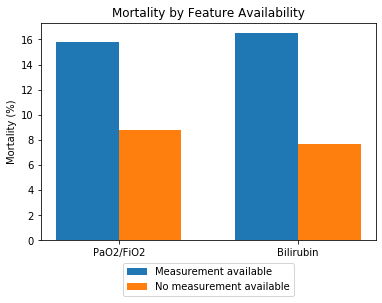

In [64]:
# Filter for patients that have a measurement of PaO2/FiO2
PaO2_pos = saps_ii[saps_ii[:,9] != None]
PaO2_neg = saps_ii[saps_ii[:,9] == None]

# Filter for patients that have a measurement of Bilirubin
bili_pos = saps_ii[saps_ii[:,16] != None]
bili_neg = saps_ii[saps_ii[:,16] == None]

# Calculate mortality rates for patients with/without PaO2/FiO2 measurements
mort_PaO2_pos = sum(PaO2_pos[:,-1])/len(PaO2_pos[:,-1]) * 100
mort_PaO2_neg = sum(PaO2_neg[:,-1])/len(PaO2_neg[:,-1]) * 100
mort_paO2 = [mort_PaO2_pos, mort_PaO2_neg]

# Calculate mortality rates for patients with/without Bilirubin measurements
mort_bili_pos = sum(bili_pos[:,-1])/len(bili_pos[:,-1]) * 100
mort_bili_neg = sum(bili_neg[:,-1])/len(bili_neg[:,-1]) * 100
mort_pos = [mort_bili_pos, mort_bili_neg]
mort_neg = [mort_PaO2_pos, mort_PaO2_neg]

# Plot
labels = ["PaO2/FiO2", "Bilirubin"]
x = np.arange(len(labels))
width = 0.35
mort_pos = [mort_PaO2_pos, mort_bili_pos]
mort_neg = [mort_PaO2_neg, mort_bili_neg]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mort_pos, width, label='Measurement available')
rects2 = ax.bar(x + width/2, mort_neg, width, label='No measurement available')
ax.set_ylabel('Mortality (%)')
ax.set_title('Mortality by Feature Availability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.77,-0.08))
plt.show()